### Importing necessary libraries

In [25]:
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sn

#
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv('Advertising.csv')
data1

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data1.drop('Unnamed: 0',axis=1,inplace=True)
data1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Dataset Description

In [6]:
data1.shape

(200, 4)

In [10]:
data1.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data1.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


##### Observation:

        The data in both independent features and target feature is float64 datatype.
        
        All features are continuous type.
        
        We see that all the columns have equal no. of data.

### Check for duplicate rows

In [17]:
dup_data1=data1[data1.duplicated()]
dup_data1.shape

(0, 4)

##### Observation:

        There are no duplicate rows of data.

# Feature Analysis

In [11]:
data1.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
data1['TV'].isnull().sum()

0

In [33]:
df_corr=data1.corr()
df_corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


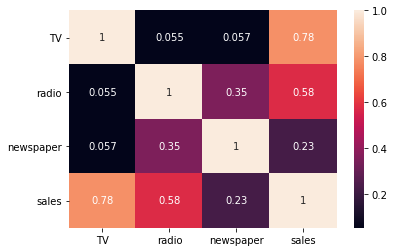

In [34]:
sn.heatmap(df_corr,annot=True)
plt.show()

##### Observation:

        Only 'tv' has somewhat strong correlation with 'sales' as compared to other two sales channel.
        
        We can observe this trend from below scatter plots.

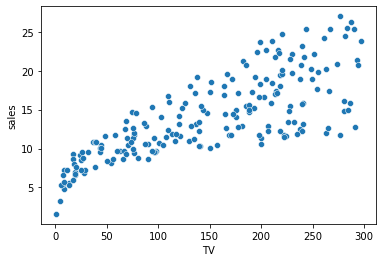

In [32]:
sn.scatterplot(x=data1['TV'],y=data1['sales'])
plt.show()

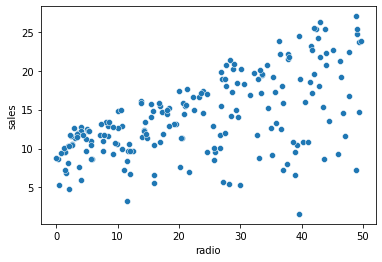

In [35]:
sn.scatterplot(x=data1['radio'],y=data1['sales'])
plt.show()

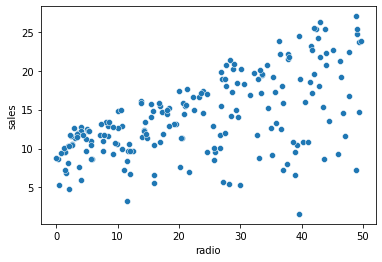

In [36]:
sn.scatterplot(x=data1['radio'],y=data1['sales'])
plt.show()

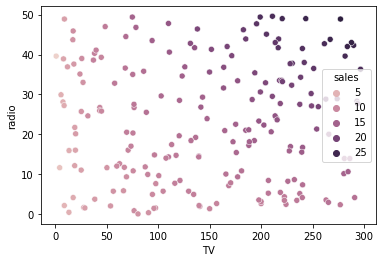

In [38]:
sn.scatterplot(x=data1['TV'],y=data1['radio'],hue=data1['sales'])
plt.show()

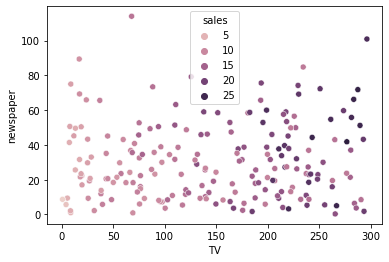

In [39]:
sn.scatterplot(x=data1['TV'],y=data1['newspaper'],hue=data1['sales'])
plt.show()

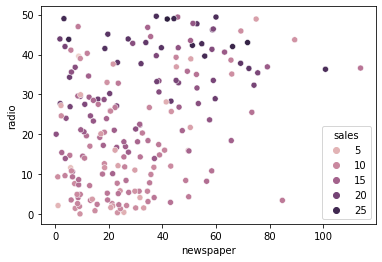

In [40]:
sn.scatterplot(x=data1['newspaper'],y=data1['radio'],hue=data1['sales'])
plt.show()

# Handling of missing values

In [28]:
data1['TV'].isnull().sum()

0

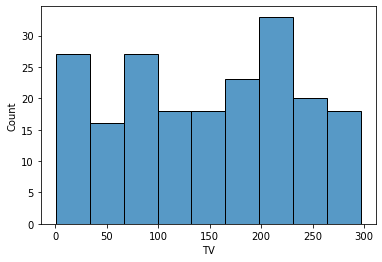

In [16]:
sn.histplot(data1['TV'])
plt.show()

In [29]:
data1['radio'].isnull().sum()

0

In [30]:
data1['newspaper'].isnull().sum()

0

In [31]:
data1['sales'].isnull().sum()

0

 # Outlier management

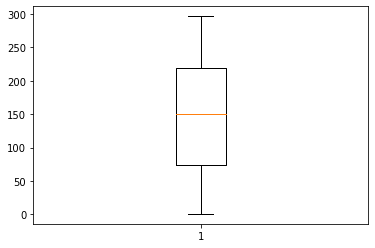

In [18]:
plt.boxplot(data1['TV'])
plt.show()

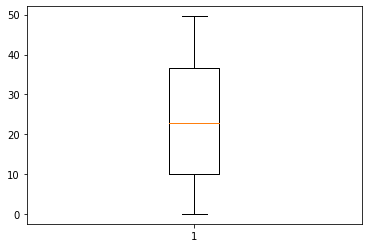

In [19]:
plt.boxplot(data1['radio'])
plt.show()

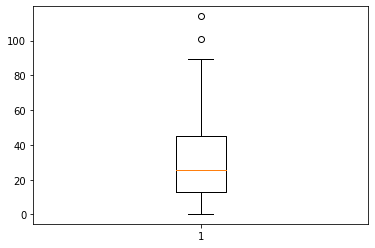

In [20]:
plt.boxplot(data1['newspaper'])
plt.show()

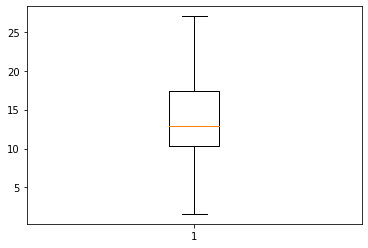

In [21]:
plt.boxplot(data1['sales'])
plt.show()

##### Observation:

    The dataset has no outliers.

# Check skewness

In [23]:
data1.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

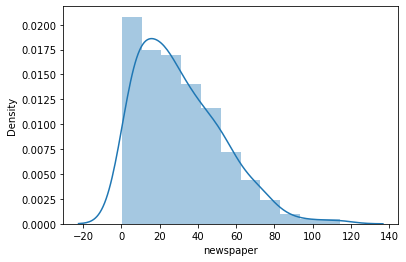

In [26]:
sn.distplot(data1['newspaper'])
plt.show()

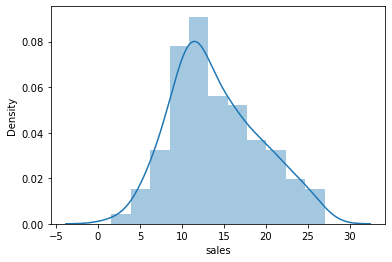

In [27]:
sn.distplot(data1['sales'])
plt.show()

##### Observation:

    There is some skewness present in the 'newspaper' column.

# Splitting the dataset 

In [41]:
x=data1.drop('sales',axis=1)
y=data1['sales']

In [42]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


# scaling the data

In [48]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

# Building the model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error

lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [51]:
lr.score(x_train,y_train)

0.8874345006089226

##### Observation:

    Our model is learning with accuracy of 88%.

In [52]:
lr.coef_

array([3.89338324, 2.76128159, 0.06671519])

In [53]:
lr.intercept_

13.788059701492537

In [56]:
pred_lr=lr.predict(x_test)

In [58]:
print('Error:\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('\nMean squared error: ',mean_squared_error(y_test,pred_lr))
print('\nRoot mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

Error:

Mean absolute error:  1.1163243077825464

Mean squared error:  2.30460308993616

Root mean squared error:  1.5180919240731636


In [60]:
from sklearn.metrics import r2_score
print('r2_score: ',r2_score(y_test,pred_lr))

r2_score:  0.9142453857006445


In [63]:
# cross validation
from sklearn.model_selection import cross_val_score

score_cv = cross_val_score(lr, x_train, y_train, cv=10)
print(score_cv)

print('\n The mean score we got from 10-Fold CV:',np.mean(score_cv))

[0.91217478 0.89806781 0.73955631 0.78552854 0.88342622 0.86370208
 0.8382574  0.95103244 0.94586327 0.73183594]

 The mean score we got from 10-Fold CV: 0.8549444795402785


### To avoid overfitting, use of lasso

In [66]:
from sklearn.linear_model import Lasso,Ridge

In [67]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)

cvs_ls=cross_val_score(ls,x_train,y_train,cv=10)
print('\n The mean score we got from 10-Fold CV:',np.mean(cvs_ls))


 The mean score we got from 10-Fold CV: 0.8549493395279629


##### Observation:


    There is no significant difference between the cross validation scores after Ridge regrssion.

### Grid Search CV using Ridge

In [70]:
from sklearn.model_selection import GridSearchCV

alpha_value={'alpha':[1.0,0.1,0.01,0.001,0.0001,0]}

model=Ridge()

grid=GridSearchCV(estimator=model,param_grid=alpha_value)

grid.fit(x,y)

print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.8871067777046353
1.0
{'alpha': 1.0}


#### So we will use alpha = 1.0

In [71]:
rd=Ridge()
rd.fit(x_train,y_train)

cvs_rd=cross_val_score(rd,x_train,y_train,cv=10)
print('\n The mean score we got from 10-Fold CV:',np.mean(cvs_rd))


 The mean score we got from 10-Fold CV: 0.8555176922561541


### Comparing the cross validation results 

In [72]:
results=[]
results.append(score_cv)
results.append(cvs_ls)
results.append(cvs_rd)

names=[]
names.append("Linear Regression")
names.append("Lasso")
names.append("Ridge")

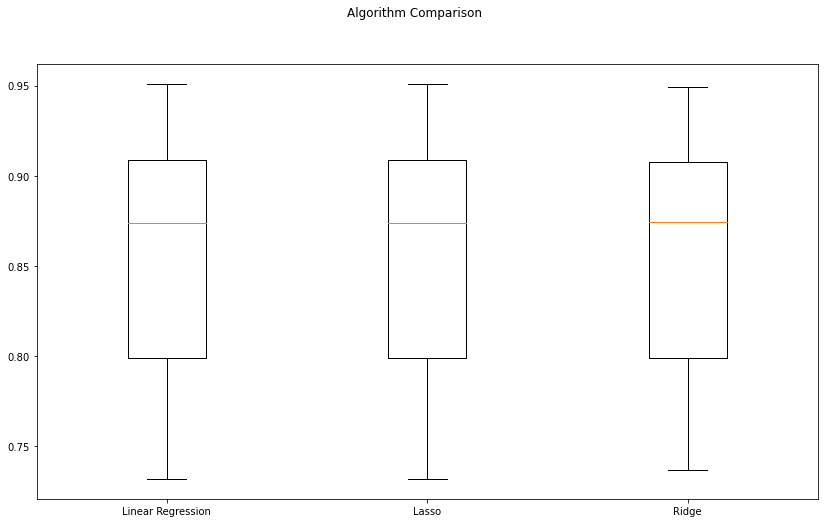

In [73]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### Observation:

        There is no significant difference observed ,so we will go with linear regression model.

# Saving the model

In [75]:
import joblib
joblib.dump(lr,"advertising_sales_channel_prediction.pkl")

['advertising_sales_channel_prediction.pkl']